In [5]:
!pip install tensorflow-data-validation # Installing the required library


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow_data_validation as tfdv

try:
    import fastparquet
except ImportError:
    !pip install fastparquet
    import fastparquet

march_data = pd.read_parquet('yellow_tripdata_2020-03.parquet', engine='fastparquet')
may_data = pd.read_parquet('yellow_tripdata_2020-05.parquet', engine='fastparquet')


In [6]:
print("March Data:")
print(march_data.head())
print("May Data:")
print(may_data.head())

March Data:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2020-03-01 00:31:13   2020-03-01 01:01:42              1.0   
1         2  2020-03-01 00:08:22   2020-03-01 00:08:49              1.0   
2         1  2020-03-01 00:52:18   2020-03-01 00:59:16              1.0   
3         2  2020-03-01 00:47:53   2020-03-01 00:50:57              2.0   
4         1  2020-03-01 00:43:19   2020-03-01 00:58:27              0.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.70         1.0                  N            88           255   
1           0.00         1.0                  N           193           193   
2           1.10         1.0                  N           246            90   
3           0.87         1.0                  N           151           238   
4           4.40         1.0                  N            79           261   

   payment_type  fare_amount  extra  mta_tax  tip_amount  toll

In [7]:
print("Checking missing values in March Data:")
print(march_data.isnull().sum())

Checking missing values in March Data:
VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            37808
trip_distance                  0
RatecodeID                 37808
store_and_fwd_flag         37808
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       37808
airport_fee              3007687
dtype: int64


In [8]:
print("Checking missing values in May Data:")
print(may_data.isnull().sum())


Checking missing values in May Data:
VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count           58901
trip_distance                 0
RatecodeID                58901
store_and_fwd_flag        58901
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      58901
airport_fee              348415
dtype: int64


In [9]:
march_data_clean = march_data.dropna()
may_data_clean = may_data.dropna()

In [10]:
print("Missing values after cleaning March Data:")
print(march_data_clean.isnull().sum())

Missing values after cleaning March Data:
VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
dtype: float64


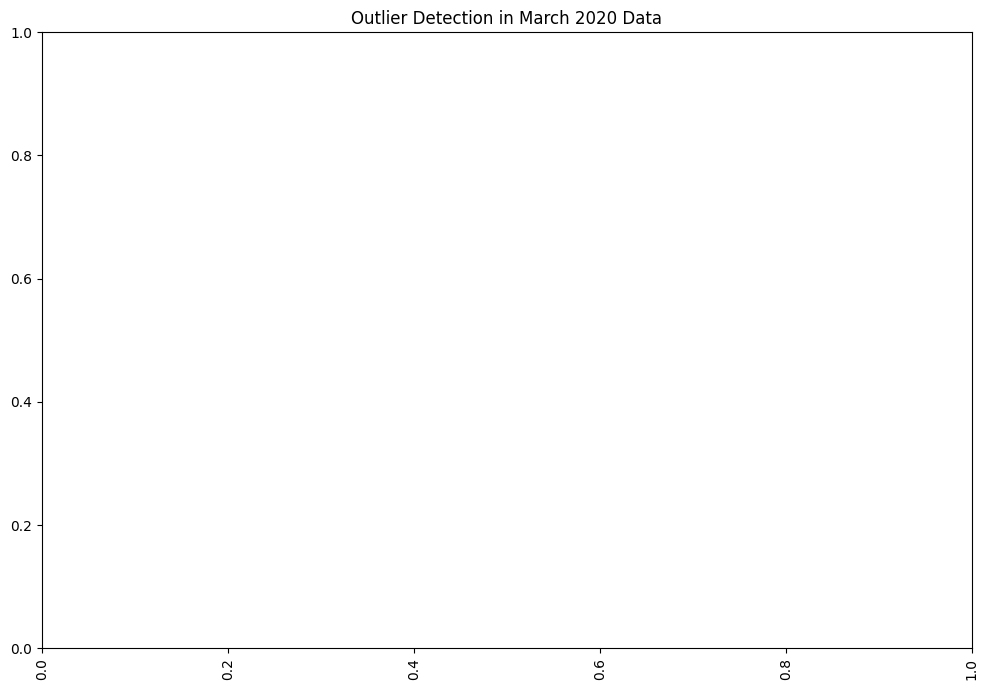

In [11]:
plt.figure(figsize=(12, 8))
numeric_columns = march_data_clean.select_dtypes(include=['float64', 'int64']).columns
sns.boxplot(data=march_data_clean[numeric_columns])
plt.xticks(rotation=90)
plt.title('Outlier Detection in March 2020 Data')
plt.show()

In [12]:
print("Data types in March Data:")
print(march_data_clean.dtypes)


Data types in March Data:
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object


In [13]:

numeric_features = march_data_clean.select_dtypes(include=['float64', 'int64'])
categorical_features = march_data_clean.select_dtypes(include=['object', 'category'])

In [14]:
print("Numeric Features: ", numeric_features.columns)
print("Categorical Features: ", categorical_features.columns)

Numeric Features:  Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')
Categorical Features:  Index(['store_and_fwd_flag'], dtype='object')


In [15]:
print("Summary Statistics for March Data:")
print(march_data_clean.describe())

Summary Statistics for March Data:
       VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
count       0.0              0.0            0.0         0.0           0.0   
mean        NaN              NaN            NaN         NaN           NaN   
std         NaN              NaN            NaN         NaN           NaN   
min         NaN              NaN            NaN         NaN           NaN   
25%         NaN              NaN            NaN         NaN           NaN   
50%         NaN              NaN            NaN         NaN           NaN   
75%         NaN              NaN            NaN         NaN           NaN   
max         NaN              NaN            NaN         NaN           NaN   

       DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
count           0.0           0.0          0.0    0.0      0.0         0.0   
mean            NaN           NaN          NaN    NaN      NaN         NaN   
std             NaN           NaN    

<ipython-input-16-8f6734c6349e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = march_data_clean.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


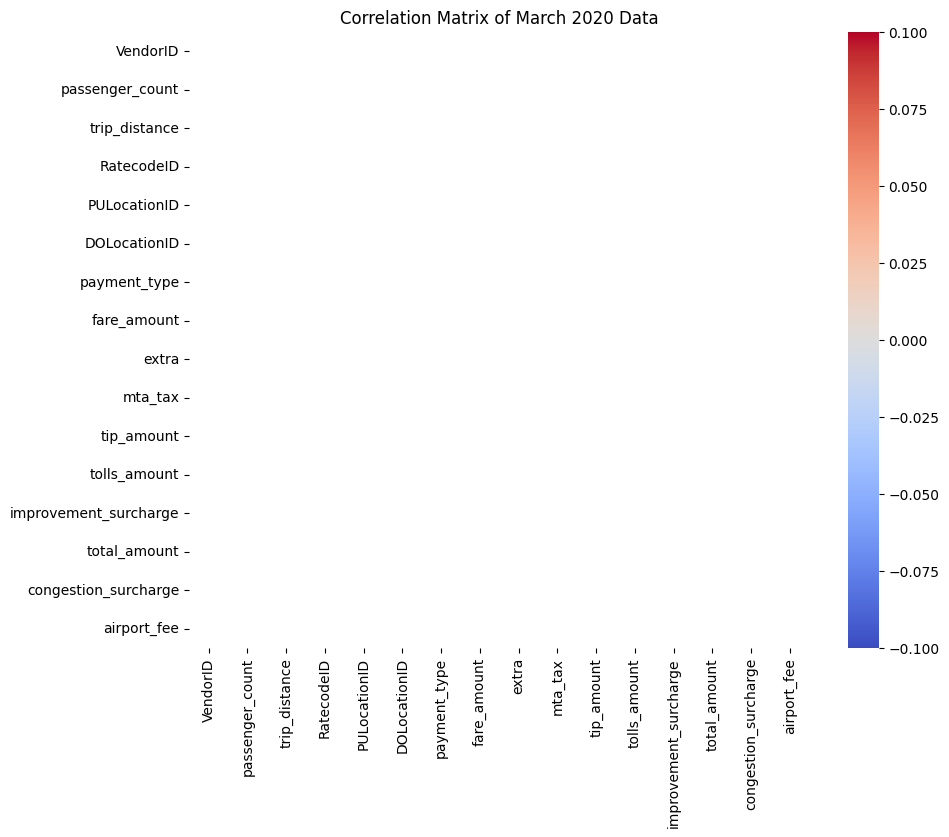

In [16]:
correlation_matrix = march_data_clean.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of March 2020 Data')
plt.show()

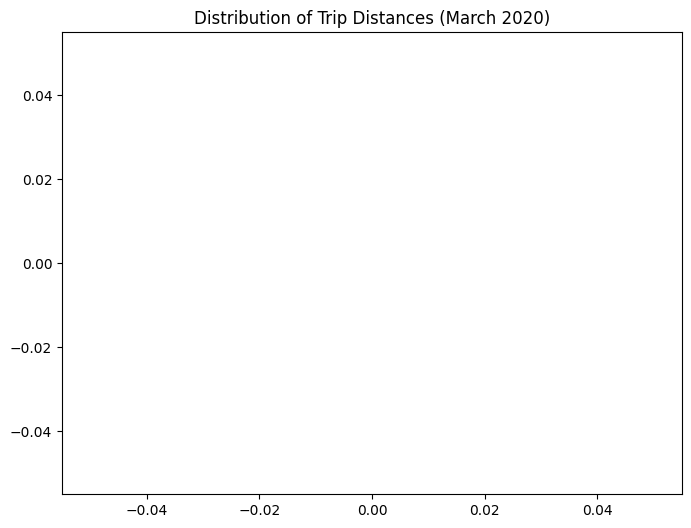

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(march_data_clean['trip_distance'], bins=50 )
plt.title('Distribution of Trip Distances (March 2020)')
plt.show()

In [18]:
march_stats = tfdv.generate_statistics_from_dataframe(march_data_clean)
may_stats = tfdv.generate_statistics_from_dataframe(may_data_clean)

tfdv.visualize_statistics(lhs_statistics=march_stats, rhs_statistics=may_stats)


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1316: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.hue_vals = pd.Series(["_nolegend_"] * len(data),


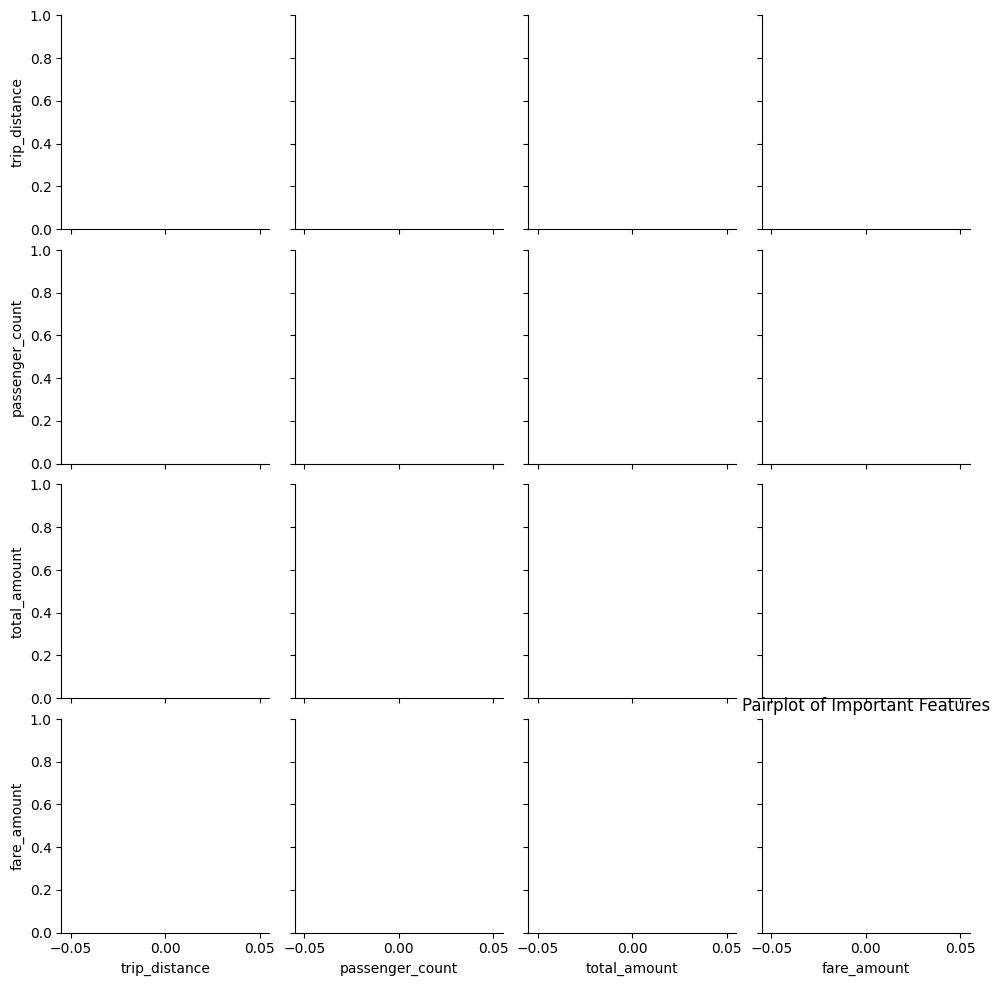

In [19]:
important_columns = ['trip_distance', 'passenger_count', 'total_amount', 'fare_amount']
sns.pairplot(march_data_clean[important_columns])
plt.title('Pairplot of Important Features')
plt.show()


In [23]:
march_data_clean.to_csv('training_data_march_2020.csv', index=False)
may_data_clean.to_csv('evaluation_data_may_2020.csv', index=False)
jan_data = pd.read_parquet('yellow_tripdata_2020-01.parquet', engine='fastparquet')
jan_data['trip_month'] = 'January'
march_data_clean['trip_month'] = 'March'
comparison_data = pd.concat([jan_data[['trip_distance', 'passenger_count', 'trip_month']],
                             march_data_clean[['trip_distance', 'passenger_count', 'trip_month']]])

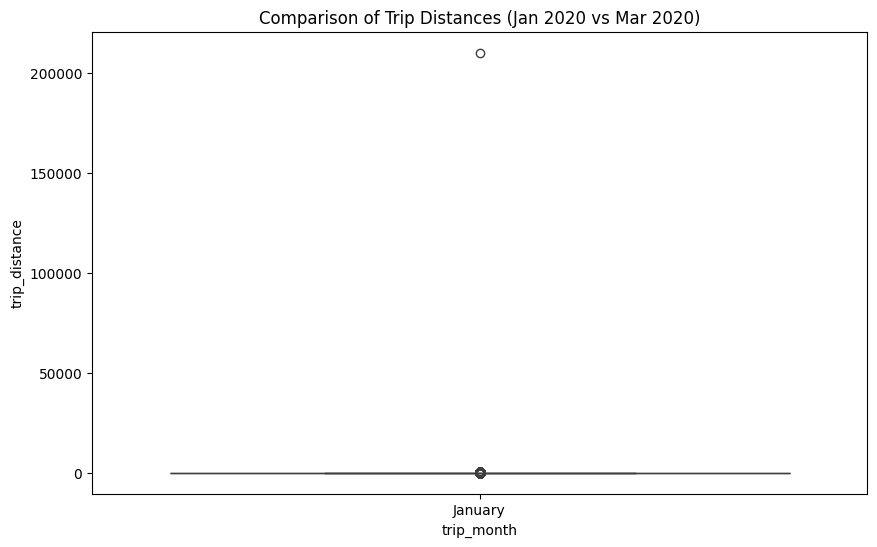

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='trip_month', y='trip_distance', data=comparison_data)
plt.title('Comparison of Trip Distances (Jan 2020 vs Mar 2020)')
plt.show()
